# Amazon Reviews Dataset
This notebook explores the dataset that was downloaded from [Amazon Reviews 2018](https://nijianmo.github.io/amazon/) 


In [1]:
# make sure you run the rs_pttf notebook
!which python

/home/gkoren2/miniconda3/envs/recbole/bin/python


In [2]:
import os
import pandas as pd
import json
from tqdm.notebook import tqdm
import gzip

In [3]:
# amz_dataset_root = '/home/guy/sd1tb/datasets/amazon'
amz_dataset_root = '/home/gkoren2/datasets/recsys/amazon'
os.listdir(amz_dataset_root)

['meta_Luxury_Beauty.json.gz',
 'meta_Industrial_and_Scientific.json.gz',
 'meta_Clothing_Shoes_and_Jewelry.json.gz',
 'meta_Clothing_Shoes_and_Jewelry.csv',
 'meta_AMAZON_FASHION.json.gz',
 'meta_All_Beauty.json.gz',
 'meta_Clothing_Shoes_and_Jewelry.json']

In [6]:
def load_data(meta_file_name):
    cached_filename = os.path.join(amz_dataset_root,os.path.basename(meta_file_name).split('.json')[0]+'.csv')
    if os.path.exists(cached_filename):
        print(f'loading from cached file {cached_filename}')
        df=pd.read_csv(cached_filename)
    else:
        data=[]
        with gzip.open(meta_file_name) as f:
            for l in tqdm(f):
                data.append(json.loads(l.strip()))
        df = pd.DataFrame.from_dict(data)
        df.to_csv(cached_filename,index=False)
    return df 

## Download images

### prepare the list of images

In [4]:
# meta_file =os.path.join(amz_dataset_root, 'meta_AMAZON_FASHION.json')
meta_file =os.path.join(amz_dataset_root, 'meta_Clothing_Shoes_and_Jewelry.json.gz')
meta_file

'/home/gkoren2/datasets/recsys/amazon/meta_Clothing_Shoes_and_Jewelry.json.gz'

In [7]:
df = load_data(meta_file)
df.head()

loading from cached file /home/gkoren2/datasets/recsys/amazon/meta_Clothing_Shoes_and_Jewelry.csv


/tmp/ipykernel_10968/1685261799.py:5: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(cached_filename)


,category,description,title,brand,feature,rank,date,asin,imageURL,imageURLHighRes,also_view,price,fit,also_buy,main_cat,tech1,details,similar_item,tech2
0,"['Clothing, Shoes & Jewelry', 'Costumes & Acce...","['6"" long, stretched waist measures 11 1/2"" ac...",Purple Sequin Tiny Dancer Tutu Ballet Dance Fa...,Big Dreams,"['3 layers of tulle', '6"" long, stretched wais...","19,963,069inClothing,ShoesJewelry(",5 star5 star (0%),0000037214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"['Clothing, Shoes & Jewelry', 'Luggage & Trave...",['The Hottest Bag in Town! Brand: Anello Condi...,Japan Anello Backpack Unisex LARGE LIGHT GRAY ...,Anello,"['Polyester Canvas Waterproof', 'Imported', 'S...","4,537,420inClothing,ShoesJewelry(",5 star,0201377179,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"['Clothing, Shoes & Jewelry', 'Luggage & Trave...",['The Hottest Bag in Town! Brand: Anello Condi...,Japan Anello Backpack Unisex PINK BEIGE LARGE ...,Anello,"['PU Leather', 'Imported', 'Size: Large PU Lea...","3,994,472inClothing,ShoesJewelry(",5 star,0204444454,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,"['B07CJF5HLR', 'B01EBI8UH6', 'B01N1LR908', 'B0...",$70.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"['Clothing, Shoes & Jewelry', 'Luggage & Trave...",['The Hottest Bag in Town! Brand: Anello Condi...,Japan Anello Backpack Unisex BLACK LARGE PU LE...,Anello,"['PU Leather', 'Imported', 'Size: Large PU Lea...","635,761inClothing,ShoesJewelry(",5 star,0204444403,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,"['B01DLVYOPG', 'B07CJF5HLR', 'B01MSS59Y6', 'B0...",$65.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"['Clothing, Shoes & Jewelry', 'Novelty & More'...",['Brand New. Hat Centre Length: adult about 8...,bettyhome Unisex Adult Winter Spring Thicken C...,bettyhome,"['Imported', 'Plush,Cotton, Polyester', 'Lovel...","5,061,041inClothing,ShoesJewelry(",5 star5 star (0%),0206313535,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,"['B00VGT93YS', 'B07FTY87LM', 'B01IKVOY8E', 'B0...",$18.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
url_list = [e for l in df.imageURLHighRes if isinstance(l,list) for e in l ]
len(url_list)

### Download the images

In [ ]:
import subprocess

def runcmd(cmd, verbose = False, *args, **kwargs):

    process = subprocess.Popen(
        cmd,
        stdout = subprocess.PIPE,
        stderr = subprocess.PIPE,
        text = True,
        shell = True
    )
    std_out, std_err = process.communicate()
    if verbose:
        print(std_out.strip(), std_err)
    pass

runcmd('echo "Hello, World!"', verbose = True)

In [ ]:
dirname = os.path.join(amz_dataset_root,os.path.splitext(os.path.basename(meta_file))[0])
print(f'creating {dirname}')
os.makedirs(dirname,exist_ok=True)


In [ ]:
import wget
wget.download(url_list,dirname)

In [ ]:
# download n_imgs images starting from index s_img
s_img = 0
n_imgs = 100000
for img in tqdm(url_list[s_img:s_img+n_imgs]):
    cmd=f'wget -P {dirname} {img}'
    runcmd(cmd)

### Viewing downloaded images

In [8]:
from PIL import Image


In [9]:
def image_grid(imgs, rows, cols):
#     assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [10]:
dirname = os.path.join(amz_dataset_root,os.path.splitext(os.path.basename(meta_file))[0])
dirname

'/home/gkoren2/datasets/recsys/amazon/meta_Clothing_Shoes_and_Jewelry.json'

In [19]:
def get_item_details(item_idx):
    print(df.loc[item_idx,'title'])
    try:
        print(eval(df.loc[item_idx,'description']))
    except:
        print('no item description')
    img_fn = [os.path.basename(f) for f in eval(df['imageURLHighRes'][item_idx])]
    img_fn = [os.path.join(dirname,f) for f in img_fn]
    try:
        if len(img_fn)>1:
            imgs=[Image.open(i) for i in img_fn[:5]]
            return image_grid(imgs,5,1)
        else:
            return Image.open(img_fn[0])
    except:
        print('couldnt load images')
        return
    

In [ ]:
item_idx =1234   # multiple instances of a watch in the same image 
item_idx = 123   # several images of a custom
print(df.loc[item_idx,'title'])
eval(df.loc[item_idx,'description'])

In [ ]:
eval(df['imageURLHighRes'][item_idx])

In [ ]:
img1_fn = [os.path.basename(f) for f in eval(df['imageURLHighRes'][item_idx])]
img1_fn

In [ ]:
img1_fn = [os.path.join(dirname,f) for f in img1_fn]
img1_fn

In [ ]:
Image.open(img1_fn[0])

In [ ]:
imgs = [Image.open(f) for f in img1_fn]
image_grid(imgs, 2, 4)


Japan Anello Backpack Unisex NAVY MINI SMALL PU LEATHER Rucksack School Bag Campus
['The Hottest Bag in Town! Brand: Anello Condition: 100% brand new Size: MINI / SMALL SIZE Material: PU Leather Simplistic Japanese design to add spark to your style! Main compartment with a large capacity can fit numerous items! Comes with a front zip pocket, 2 interior open pockets, side bottle pockets and a zipper at the back! Made of stylish, elegant and durable PU leather fabric! - Roomy main compartment and multiple pockets for functionally - Comes with adjustable double shoulder straps and double top handles - Simple and stylish design that goes well with most outfits - Made of stylish, elegant and durable and PU leather fabric Specifications: Size: approx. H 32 x W 23 x D 14cm Shoulder straps: adjustable Weight: approx. 600g Material: PU Leather']


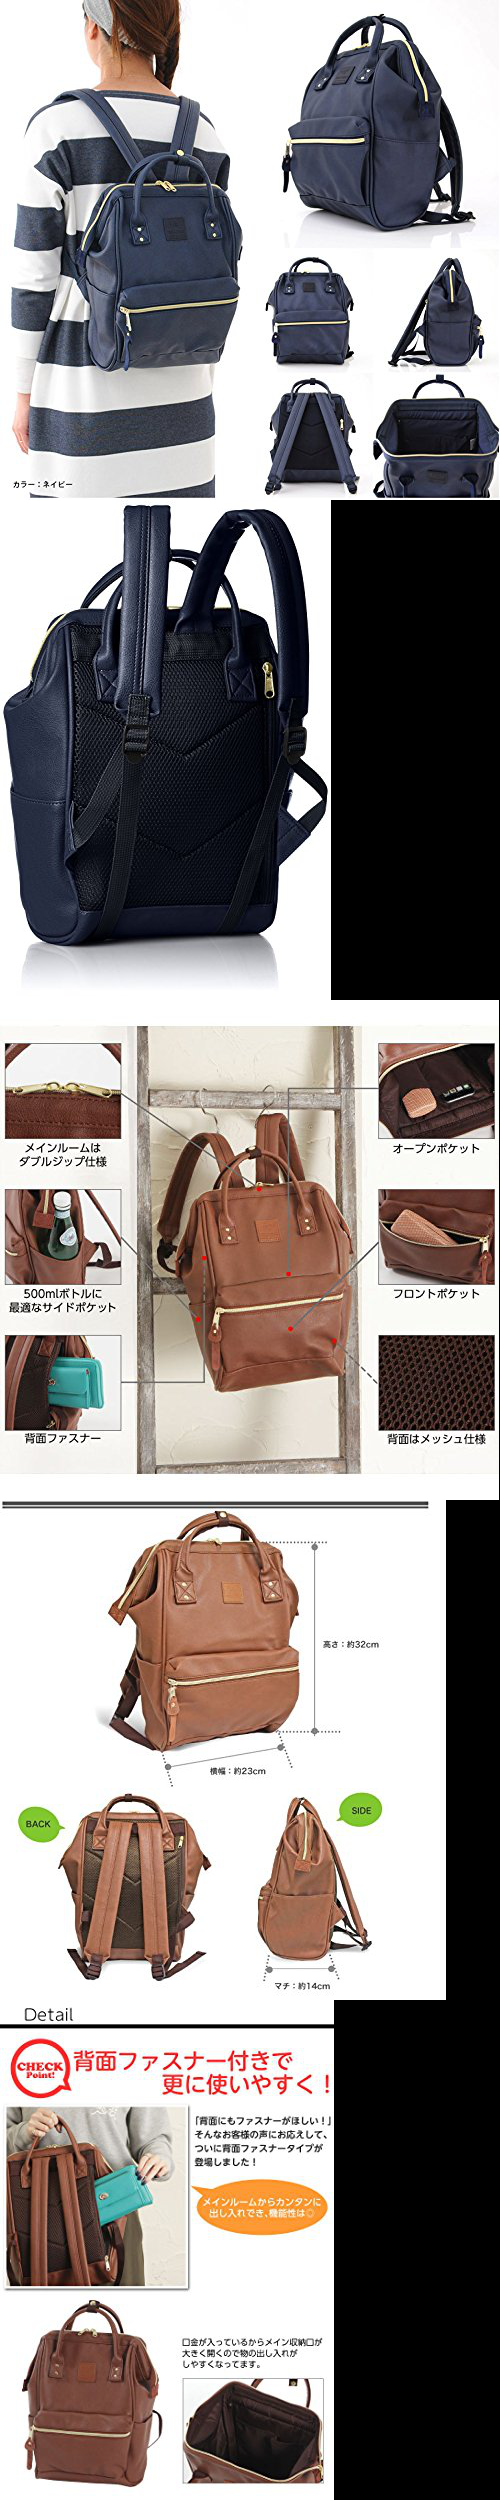

In [23]:
# item_idx =1234   # multiple instances of a watch in the same image 
# item_idx = 123   # several images of a custom
item_idx=7
get_item_details(item_idx)

In [24]:
df.loc[7,:]

category           ['Clothing, Shoes & Jewelry', 'Luggage & Trave...
description        ['The Hottest Bag in Town! Brand: Anello Condi...
title              Japan Anello Backpack Unisex NAVY MINI SMALL P...
brand                                                         Anello
feature            ['PU Leather', 'Imported', 'Size: Mini / Small...
rank                               5,428,251inClothing,ShoesJewelry(
date                                                          5 star
asin                                                      0244444404
imageURL           ['https://images-na.ssl-images-amazon.com/imag...
imageURLHighRes    ['https://images-na.ssl-images-amazon.com/imag...
also_view          ['0244444692', 'B01DLVYOME', '0204444470', '02...
price                                                            NaN
fit                                                              NaN
also_buy                                                         NaN
main_cat                          